In [83]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pylab as plt
import matplotlib
from numpy import linalg as la
from scipy.optimize import fsolve
from scipy import linalg as scpla
# import seaborn as sb
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cmath import *
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve,leastsq 
from math import tanh,cosh
import math
import time
# from sympy import *
from scipy.linalg import schur, eigvals
extras_require = {'PLOT':['matplotlib>=1.1.1,<3.0']},

# RANK-1 CASE, with SYMMETRIC RANDOM COMPONENTS
## mean low rank connectivity, generate $\bar{\mathbf{m}},\ \bar{\mathbf{n}}$ and unperturbed low rank connectivity is $\bar{\mathbf{J}}=\bar{\mathbf{m}}\bar{\mathbf{n}}^{\intercal}$.



In [211]:
''' Network Settings '''
## scale
Nt=np.array([1000,1000])
NE,NI=Nt[0],Nt[1]
Nparams=np.array([NE,NI])

## low rank structure
JE,JI,a,b=1.0,3.5,-0.6,0.6 # already recording -3.5
a,b=0.0,0.0
nrank=1
JEE,JIE,JEI,JII=JE+a,JE-a,JI-b,JI+b
# generate mean Am
Am =np.zeros((NE+NI,NE+NI))
Am[:NE,:NE],Am[:NE,NE:]=JEE/NE,-JEI/NI
Am[NE:,:NE],Am[NE:,NE:]=JIE/NE,-JII/NI
## eigenspectrum
eigvalAm,eigvecAm=la.eig(Am)
inveigvecAm=la.inv(eigvecAm)
meigAm = np.reshape(np.squeeze(eigvecAm[:,:nrank].copy()),(NE*2,nrank))
neigAm = np.reshape(np.squeeze(inveigvecAm[:nrank,:].copy()),(nrank,NE*2)) # inverse
neigAm = neigAm.T
## normalize
renorm_neig=np.zeros(nrank)
for i in range(nrank):
  ampdelta = np.sum(meigAm[:,i]*neigAm[:,i])
  neigAm[:,i] *= (eigvalAm[i]/ampdelta)
# print('m_bar')
# print(meigAm[1::NE,0])
# print('n_bar')
# print(neigAm[1::NE,0])
# print('JE,JI')
# print(neigAm[1,0]/neigAm[NE,0],JE/JI)

''' ## variables to be taken 
low rank unperturbed $Am$--$\bar{\mathbf{J}}$
low rank connectivity: $\bar{\mathbf{m}},\ \bar{\mathbf{n}}$
eigenvalues: $\lambda^O$
'''


' ## variables to be taken \nlow rank unperturbed $Am$--$\x08ar{\\mathbf{J}}$\nlow rank connectivity: $\x08ar{\\mathbf{m}},\\ \x08ar{\\mathbf{n}}$\neigenvalues: $\\lambda^O$\n'

**Random Components, symmetric**

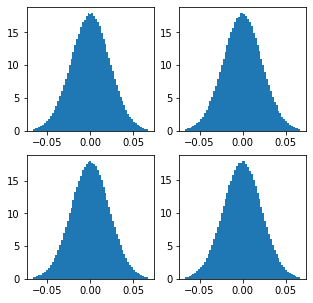

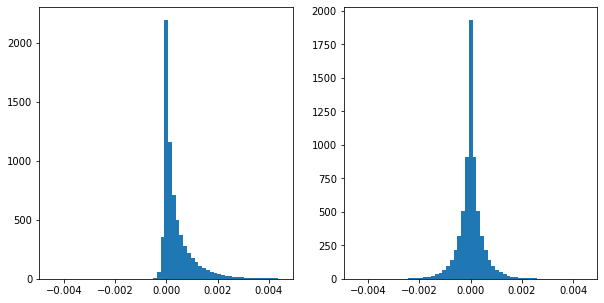

In [212]:
'''
parameters for random symmetricity
eta: testing it
local statistics: Gaussian
'''
## simplest case with homogeneous random gain 
etasym = 0.8
gaverage =1.0
# format X = np.sqrt(rho)X0+np.sqrt(1-rho)X0.T
X0 = np.random.randn(NE*2,NE*2)/np.sqrt(2*NE)
rhosym = (1-np.sqrt(1-etasym**2))/2.0 #(1+np.sqrt(1-etasym**2))/2.0 # 
X = np.sqrt(rhosym)*X0+np.sqrt(1-rhosym)*X0.T 
X*=gaverage
''' validate the local and symmetric statistics '''
XEEentries,XEIentries,XIEentries,XIIentries = np.reshape(X[:NE,:NE],(NE*NE,1)),np.reshape(X[:NE,NE:],(NE*NE,1)),\
np.reshape(X[NE:,:NE],(NE*NE,1)),np.reshape(X[NE:,NE:],(NE*NE,1))
# Gaussian distribution
fig,ax=plt.subplots(2,2,figsize=(5,5))
std3=3.0*gaverage/np.sqrt(2*NE)
Xrange =np.linspace(-std3,std3,61)
Xrangebin=[-std3,std3]
n,bins,patches=ax[0][0].hist(XEEentries, bins=61, range=Xrangebin, density=True)
n,bins,patches=ax[0][1].hist(XEIentries, bins=61, range=Xrangebin, density=True)
n,bins,patches=ax[1][0].hist(XIEentries, bins=61, range=Xrangebin, density=True)
n,bins,patches=ax[1][1].hist(XIIentries, bins=61, range=Xrangebin, density=True)

# symmetricity
XTX,XTX0 = X.T*X,X0.T*X0
fig,ax=plt.subplots(1,2,figsize=(10,5))
Xrangebin2=[-std3**2,std3**2]
n,bins,patches=ax[0].hist(np.reshape(XTX,((NE*2)**2,1)), bins=61, range=Xrangebin2, density=True)
n,bins,patches=ax[1].hist(np.reshape(XTX0,((NE*2)**2,1)), bins=61, range=Xrangebin2, density=True)



In [174]:
# measurements
statssym = np.zeros(2)
statssym[0]=np.mean(np.reshape(XTX,(NE*NE*2*2,1)))
statssym[1]=np.std(np.reshape(XTX,(NE*NE*2*2,1)))
print('symmetricity')
print('theoretical:',etasym*gaverage**2/(NE*2),'; numerical:',statssym[0])

symmetricity
theoretical: 0.00045 ; numerical: 0.0004510138704639823


**PURE RANDOM**

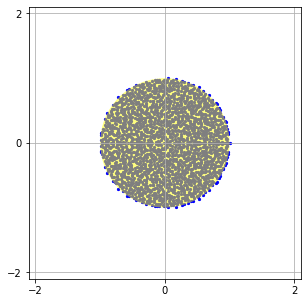

In [191]:
## elliptical eigenspectrum
from matplotlib.patches import Ellipse
eigvalX,eigvecX=la.eig(X)
lambdaticks=np.linspace(-2.0*gaverage,2.0*gaverage,3)
lambdalims=[-2.1*gaverage,2.1*gaverage]
fig,ax=plt.subplots(figsize=(5,5))


ax.set_xlim(lambdalims)
ax.set_xticks(lambdaticks)
ax.set_ylim(lambdalims)
ax.set_yticks(lambdaticks)
ax.set_aspect('equal')
ax.grid()
ells = Ellipse(np.zeros(2), width=(1+etasym)*2*gaverage, height=(1-etasym)*2*gaverage, angle=0)
ells.set_clip_box(ax.bbox)
ells.set_alpha(0.5)
ells.set_facecolor([1,1,0])
ax.add_artist(ells)
ax.scatter(np.real(eigvalX),np.imag(eigvalX),s=5.0,c='blue',alpha=1.0)


**perturbed matrix $\mathbf{J}$**

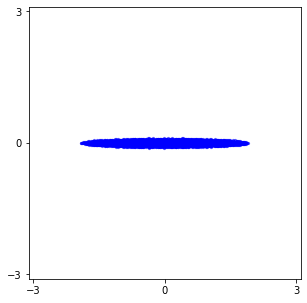

In [206]:
Xtotal=Am+X.copy()
eigvalxt,eigvecxt=la.eig(Xtotal)
lambdaticks=np.linspace(-3.0*gaverage,3.0*gaverage,3)
lambdalims=[-3.1*gaverage,3.1*gaverage]
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(np.real(eigvalxt),np.imag(eigvalxt),s=5.0,c='blue',alpha=0.5)
ax.set_xlim(lambdalims)
ax.set_xticks(lambdaticks)
ax.set_ylim(lambdalims)
ax.set_yticks(lambdaticks)
ax.set_aspect('equal')

In [89]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    print(np.shape(cov))
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

**the low rank structures of perturbed connectivity**

validate the renormalization:
eigenvalue: (3.292170168506305+0j) ; reconstruct: [[3.29217017-1.82045099e-14j]]
(2, 2)
(2, 2)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


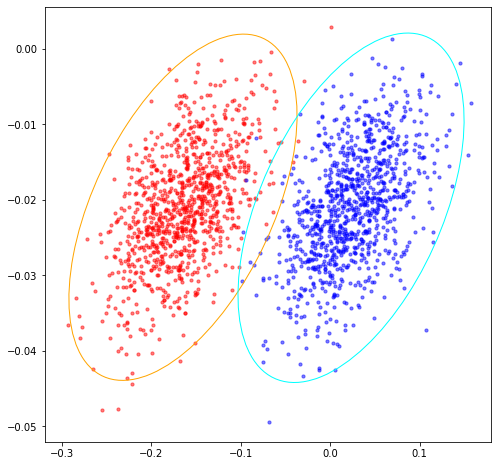

In [207]:
meigvec=np.reshape(eigvecxt[:,0].copy(),(NE*2,1))
inveigvecxt=la.inv(eigvecxt.copy())
neigvec=np.reshape(inveigvecxt[0,:],(1,NE*2))
neigvec=neigvec.T
# m normalized
neigvec*=(eigvalxt[0])
# # share
# normalabs = la.norm(neigvec.copy())
# normalabs*=(np.real(eigvalxt[0]))
# # sqrt
# normalabs=np.real(eigvalxt[0])
# if normalabs<0:
#     # neigvec/=la.norm(neigvec)
#     neigvec*=-np.sqrt(-normalabs)
#     meigvec*=np.sqrt(-normalabs)
# else:
#     # neigvec/=la.norm(neigvec)
#     neigvec*=np.sqrt(normalabs)
#     meigvec*=np.sqrt(normalabs) 
## validate the normalization
lambdarecon=neigvec.T@meigvec
print('validate the renormalization:')
print('eigenvalue:',eigvalxt[0],'; reconstruct:',lambdarecon)
fig,ax=plt.subplots(figsize=(8,8))

mE,nE=meigvec[:NE,0].copy(),neigvec[:NE,0].copy()
confidence_ellipse(np.real(nE),np.real(mE),ax,edgecolor='orange')
ax.scatter(nE,mE,s=10,c='red',alpha=0.5)
mI,nI=meigvec[NE:,0].copy(),neigvec[NE:,0].copy()
confidence_ellipse(np.real(nI),np.real(mI),ax,edgecolor='cyan')
ax.scatter(nI,mI,s=10,c='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part


(2, 2)
(2, 2)


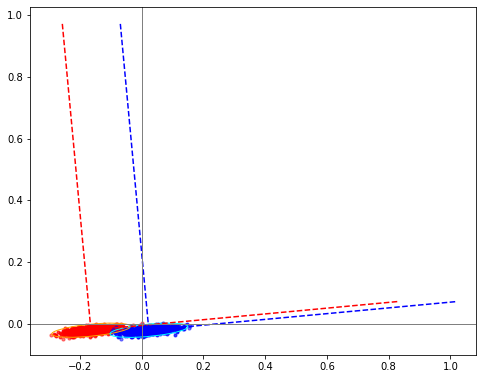

In [208]:
meanmE,meanmI,meannE,meannI=np.zeros(nrank),np.zeros(nrank),np.zeros(nrank),np.zeros(nrank)
meigvecloading,neigvecloading=meigvec.copy(),neigvec.copy()
scale_std=3.0
for irank in range(nrank):
    # m vector
    # puring E
    mEmat = np.squeeze(meigvecloading[:NE,irank])
    meanmEtotal,stdmEtotal = np.mean(mEmat),np.std(mEmat)
    varmE = mEmat - meanmEtotal
    idxwhere = np.where(np.abs(varmE)>scale_std*stdmEtotal)
    mEmat[idxwhere]=meanmEtotal
    meigvecloading[:NE,irank]=mEmat
    meanmE[irank]=np.mean(mEmat)

    # puring I
    mImat = np.squeeze(meigvecloading[NE:,irank])
    meanmItotal,stdmItotal = np.mean(mImat),np.std(mImat)
    varmI = mImat - meanmItotal
    idxwhere = np.where(np.abs(varmI)>scale_std*stdmItotal)
    mImat[idxwhere]=meanmItotal
    meigvecloading[NE:,irank]=mImat
    meanmI[irank]=np.mean(mImat)
    
    # n vector
    # puring E
    nEmat = np.squeeze(neigvecloading[:NE,irank])
    meannEtotal,stdnEtotal = np.mean(nEmat),np.std(nEmat)
    varnE = nEmat - meannEtotal
    idxwhere = np.where(np.abs(varnE)>scale_std*stdnEtotal)
    nEmat[idxwhere]=meannEtotal
    neigvecloading[:NE,irank]=nEmat
    meannE[irank]=np.mean(nEmat)

    # puring I
    nImat = np.squeeze(neigvecloading[NE:,irank])
    meannItotal,stdnItotal = np.mean(nImat),np.std(nImat)
    varnI = nImat - meannItotal
    idxwhere = np.where(np.abs(varnI)>scale_std*stdnItotal)
    nImat[idxwhere]=meannItotal
    neigvecloading[NE:,irank]=nImat
    meannI[irank]=np.mean(nImat)

''' calculate directions '''
noiseE,noiseI = np.zeros((NE,2,nrank)),np.zeros((NE,2,nrank))
dirvecE,dirvecI=np.zeros((2,2)),np.zeros((2,2))
for i in range(nrank):
    # E 0 M 1 N
    noiseE[:,0,irank],noiseE[:,1,irank]= np.squeeze(neigvecloading[:NE,irank])-meannE[irank],np.squeeze(meigvecloading[:NE,irank])-meanmE[irank]
    noiseI[:,0,irank],noiseI[:,1,irank]= np.squeeze(neigvecloading[NE:,irank])-meannI[irank],np.squeeze(meigvecloading[NE:,irank])-meanmI[irank]
# m1n1
covdirE,covdirI=np.squeeze(noiseE[:,:,0]).T@np.squeeze(noiseE[:,:,0]),np.squeeze(noiseI[:,:,0]).T@np.squeeze(noiseI[:,:,0])
_,dirvecE=la.eig(covdirE)
_,dirvecI=la.eig(covdirI)

xlims =[-0.61,0.41]
xticks = np.linspace(-0.5,0.4,3)
ylims =[-0.11,0.11]
yticks = np.linspace(-0.1,0.1,3)

# figure for eigenvectors
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(neigvecloading[NE:,0],meigvecloading[NE:,0],s=5.0,c='blue',alpha=0.5)
ax.scatter(neigvecloading[:NE,0],meigvecloading[:NE,0],s=5.0,c='red',alpha=0.5)

ax.plot([meannE[0],meannE[0]+dirvecE[0,0]],[meanmE[0],meanmE[0]+dirvecE[1,0]],color='r',linestyle='--',linewidth=1.5)
ax.plot([meannE[0],meannE[0]+dirvecE[0,1]],[meanmE[0],meanmE[0]+dirvecE[1,1]],color='r',linestyle='--',linewidth=1.5)
ax.plot([meannI[0],meannI[0]+dirvecI[0,0]],[meanmI[0],meanmI[0]+dirvecI[1,0]],color='b',linestyle='--',linewidth=1.5)
ax.plot([meannI[0],meannI[0]+dirvecI[0,1]],[meanmI[0],meanmI[0]+dirvecI[1,1]],color='b',linestyle='--',linewidth=1.5)

mE,nE=meigvec[:NE,0].copy(),neigvec[:NE,0].copy()
confidence_ellipse(np.real(nE),np.real(mE),ax,edgecolor='orange')
ax.scatter(nE,mE,s=10,c='red',alpha=0.5)
mI,nI=meigvec[NE:,0].copy(),neigvec[NE:,0].copy()
confidence_ellipse(np.real(nI),np.real(mI),ax,edgecolor='cyan')
ax.scatter(nI,mI,s=10,c='blue',alpha=0.5)
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

# xlims=[-0.41,0.41]
# xticks=np.linspace(-0.4,0.4,3)
# ylims =[-0.41,0.41]
# yticks=np.linspace(-0.4,0.4,3)
# ax.set_xlim(xlims)
# ax.set_ylim(ylims)
# ax.set_xticks(xticks)
# ax.set_yticks(yticks)
ax.set_aspect('equal')

validate the renormalization:
eigenvalue: (3.292170168506305+0j) ; reconstruct: [[3.29217017-1.82045099e-14j]]
(2, 2)
(2, 2)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


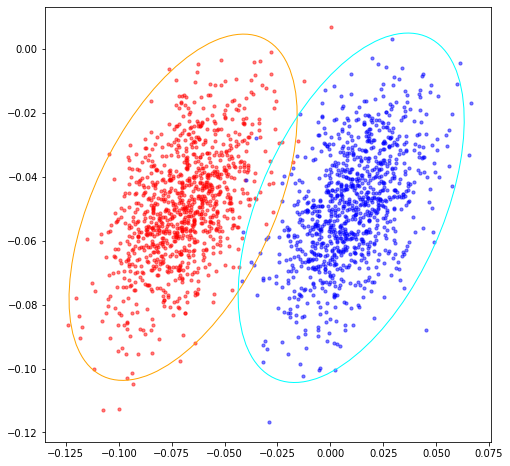

In [209]:
meigvec=np.reshape(eigvecxt[:,0].copy(),(NE*2,1))
inveigvecxt=la.inv(eigvecxt.copy())
neigvec=np.reshape(inveigvecxt[0,:],(1,NE*2))
neigvec=neigvec.T
# ''' # m normalized '''
# neigvec*=(eigvalxt[0])
''' # share '''
normalabs = la.norm(neigvec.copy())
normalabs*=(np.real(eigvalxt[0]))
if normalabs<0:
    neigvec/=la.norm(neigvec)
    neigvec*=-np.sqrt(-normalabs)
    meigvec*=np.sqrt(-normalabs)
else:
    neigvec/=la.norm(neigvec)
    neigvec*=np.sqrt(normalabs)
    meigvec*=np.sqrt(normalabs) 
# ''' ## sqrt '''
# normalabs=np.real(eigvalxt[0])
# if normalabs<0:
#     neigvec*=-np.sqrt(-normalabs)
#     meigvec*=np.sqrt(-normalabs)
# else:
#     neigvec*=np.sqrt(normalabs)
#     meigvec*=np.sqrt(normalabs) 
## validate the normalization
lambdarecon=neigvec.T@meigvec
print('validate the renormalization:')
print('eigenvalue:',eigvalxt[0],'; reconstruct:',lambdarecon)
fig,ax=plt.subplots(figsize=(8,8))

mE,nE=meigvec[:NE,0].copy(),neigvec[:NE,0].copy()
confidence_ellipse(np.real(nE),np.real(mE),ax,edgecolor='orange')
ax.scatter(nE,mE,s=10,c='red',alpha=0.5)
mI,nI=meigvec[NE:,0].copy(),neigvec[NE:,0].copy()
confidence_ellipse(np.real(nI),np.real(mI),ax,edgecolor='cyan')
ax.scatter(nI,mI,s=10,c='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part


(2, 2)
(2, 2)


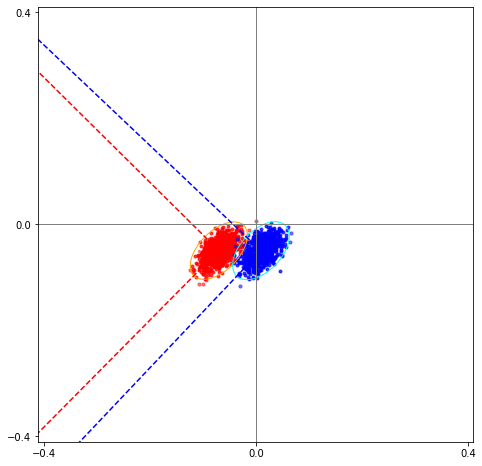

In [210]:
meanmE,meanmI,meannE,meannI=np.zeros(nrank),np.zeros(nrank),np.zeros(nrank),np.zeros(nrank)
meigvecloading,neigvecloading=meigvec.copy(),neigvec.copy()
scale_std=3.0
for irank in range(nrank):
    # m vector
    # puring E
    mEmat = np.squeeze(meigvecloading[:NE,irank])
    meanmEtotal,stdmEtotal = np.mean(mEmat),np.std(mEmat)
    varmE = mEmat - meanmEtotal
    idxwhere = np.where(np.abs(varmE)>scale_std*stdmEtotal)
    mEmat[idxwhere]=meanmEtotal
    meigvecloading[:NE,irank]=mEmat
    meanmE[irank]=np.mean(mEmat)

    # puring I
    mImat = np.squeeze(meigvecloading[NE:,irank])
    meanmItotal,stdmItotal = np.mean(mImat),np.std(mImat)
    varmI = mImat - meanmItotal
    idxwhere = np.where(np.abs(varmI)>scale_std*stdmItotal)
    mImat[idxwhere]=meanmItotal
    meigvecloading[NE:,irank]=mImat
    meanmI[irank]=np.mean(mImat)
    
    # n vector
    # puring E
    nEmat = np.squeeze(neigvecloading[:NE,irank])
    meannEtotal,stdnEtotal = np.mean(nEmat),np.std(nEmat)
    varnE = nEmat - meannEtotal
    idxwhere = np.where(np.abs(varnE)>scale_std*stdnEtotal)
    nEmat[idxwhere]=meannEtotal
    neigvecloading[:NE,irank]=nEmat
    meannE[irank]=np.mean(nEmat)

    # puring I
    nImat = np.squeeze(neigvecloading[NE:,irank])
    meannItotal,stdnItotal = np.mean(nImat),np.std(nImat)
    varnI = nImat - meannItotal
    idxwhere = np.where(np.abs(varnI)>scale_std*stdnItotal)
    nImat[idxwhere]=meannItotal
    neigvecloading[NE:,irank]=nImat
    meannI[irank]=np.mean(nImat)

''' calculate directions '''
noiseE,noiseI = np.zeros((NE,2,nrank)),np.zeros((NE,2,nrank))
dirvecE,dirvecI=np.zeros((2,2)),np.zeros((2,2))
for i in range(nrank):
    # E 0 M 1 N
    noiseE[:,0,irank],noiseE[:,1,irank]= np.squeeze(neigvecloading[:NE,irank])-meannE[irank],np.squeeze(meigvecloading[:NE,irank])-meanmE[irank]
    noiseI[:,0,irank],noiseI[:,1,irank]= np.squeeze(neigvecloading[NE:,irank])-meannI[irank],np.squeeze(meigvecloading[NE:,irank])-meanmI[irank]
# m1n1
covdirE,covdirI=np.squeeze(noiseE[:,:,0]).T@np.squeeze(noiseE[:,:,0]),np.squeeze(noiseI[:,:,0]).T@np.squeeze(noiseI[:,:,0])
_,dirvecE=la.eig(covdirE)
_,dirvecI=la.eig(covdirI)

xlims =[-0.61,0.41]
xticks = np.linspace(-0.5,0.4,3)
ylims =[-0.11,0.11]
yticks = np.linspace(-0.1,0.1,3)

# figure for eigenvectors
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(neigvecloading[NE:,0],meigvecloading[NE:,0],s=5.0,c='blue',alpha=0.5)
ax.scatter(neigvecloading[:NE,0],meigvecloading[:NE,0],s=5.0,c='red',alpha=0.5)

ax.plot([meannE[0],meannE[0]+dirvecE[0,0]],[meanmE[0],meanmE[0]+dirvecE[1,0]],color='r',linestyle='--',linewidth=1.5)
ax.plot([meannE[0],meannE[0]+dirvecE[0,1]],[meanmE[0],meanmE[0]+dirvecE[1,1]],color='r',linestyle='--',linewidth=1.5)
ax.plot([meannI[0],meannI[0]+dirvecI[0,0]],[meanmI[0],meanmI[0]+dirvecI[1,0]],color='b',linestyle='--',linewidth=1.5)
ax.plot([meannI[0],meannI[0]+dirvecI[0,1]],[meanmI[0],meanmI[0]+dirvecI[1,1]],color='b',linestyle='--',linewidth=1.5)

mE,nE=meigvec[:NE,0].copy(),neigvec[:NE,0].copy()
confidence_ellipse(np.real(nE),np.real(mE),ax,edgecolor='orange')
ax.scatter(nE,mE,s=10,c='red',alpha=0.5)
mI,nI=meigvec[NE:,0].copy(),neigvec[NE:,0].copy()
confidence_ellipse(np.real(nI),np.real(mI),ax,edgecolor='cyan')
ax.scatter(nI,mI,s=10,c='blue',alpha=0.5)
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

xlims=[-0.41,0.41]
xticks=np.linspace(-0.4,0.4,3)
ylims =[-0.41,0.41]
yticks=np.linspace(-0.4,0.4,3)
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_aspect('equal')